# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [6]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
print 'success'

success


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [7]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [112]:
def P1(num_examples=5):
    for i in range(num_examples):
        print '------------------Label: ' + categories[train_labels[i]] + '------------------'
        print 'Text:' + train_data[i]
        print '\n\n'
        

P1()

------------------Label: talk.religion.misc------------------
Text:Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych



------------------Label: sci.space------------------
Text:

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [119]:
def P2():
    cv = CountVectorizer() #set up the countvectorizer
    trans_train_data = cv.fit_transform(train_data) #fit and transform to the training data
    nonzero_features = trans_train_data.nnz * 1.0 / trans_train_data.shape[0] #calculate nonzero features
    print 'Answer to A:'
    print 'The size of the vocabulary is: ' + str(len(cv.vocabulary_)) #get vocab size
    print 'The average number of non-zero features is: ' + str(nonzero_features) 
    print 'The fraction of non-zero entries is: ' + str(nonzero_features / trans_train_data.shape[1] * 1.0)
    
    #answer to b
    feature_names = cv.get_feature_names() #get feature names from cv model
    print '\nAnswer to B:'
    print 'The 0th feature string is: ' + feature_names[0]
    print 'The last feature string is: ' + feature_names[-1]
    
    #answer to c
    vocab = ['atheism','graphics','space','religion']
    vec = CountVectorizer(vocabulary = vocab) #create cv
    new_trans_data = vec.fit_transform(train_data) #fit cv to training data
    new_nonzero_features = new_trans_data.nnz * 1.0 / new_trans_data.shape[0] #calculate nonzero features
    print '\nAnswer to C:'
    print 'Training vector shape: ' + str(new_trans_data.shape)
    print 'The average number of non-zero features is now: ' + str(new_nonzero_features)
    
    #answer to d
    train_bigram = CountVectorizer(analyzer='char', ngram_range=(2,2)) #create cv with bigram parameters
    bigram_trans = train_bigram.fit_transform(train_data) #fit bigram model to training data
    train_trigram = CountVectorizer(analyzer='char', ngram_range=(3,3)) #create cv with trigram parameters
    trigram_trans = train_trigram.fit_transform(train_data) #fit trigram model to training data
    
    print '\nAnswer to D: '
    print 'The vocabulary size of bigram features is: ' + str(bigram_trans.shape[1])
    print 'The vocabulary size of trigram features is: ' + str(trigram_trans.shape[1])
    
    #answer to e
    evec = CountVectorizer(min_df = 10) #create vc with a minimum threshold
    trans_evec_data = evec.fit_transform(train_data) #fit vc to training data
    
    print '\nAnswer to E: '
    print 'The vocabulary size of the words that appear in fewer than 10 documents is: ' + str(trans_evec_data.shape[1])
    
    
    #answer to f
    dev_vec = CountVectorizer() #create vc
    trans_dev_data = dev_vec.fit_transform(dev_data) #fit vc to dev data
    dev_feature_names = dev_vec.get_feature_names() #get feature names from vc fit to dev data
    missing_count = 0
    total_count = 0
    for i in dev_feature_names: #iterate through to find feature names missing from training data that exist in teh dev data
        if i not in feature_names:
            missing_count = missing_count + 1
        total_count = total_count + 1
    
    fraction = missing_count * 100 / total_count #calculate fraction
    
    print '\nAnswer to F: '
    print 'There are ' + str(missing_count) + ' words in the dev data missing from the train data. That means that ' + str(fraction) + '% of the dev data is not represented in the train data.'

P2()

Answer to A:
The size of the vocabulary is: 26879
The average number of non-zero features is: 96.7059980334
The fraction of non-zero entries is: 0.00359782722696

Answer to B:
The 0th feature string is: 00
The last feature string is: zyxel

Answer to C:
Training vector shape: (2034, 4)
The average number of non-zero features is now: 0.268436578171

Answer to D: 
The vocabulary size of bigram features is: 3291
The vocabulary size of trigram features is: 32187

Answer to E: 
The vocabulary size of the words that appear in fewer than 10 documents is: 3064

Answer to F: 
There are 4027 words in the dev data missing from the train data. That means that 24% of the dev data is not represented in the train data.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [139]:
def knn(k_val):
    
    cv = CountVectorizer() #create cv
    trans_train_data = cv.fit_transform(train_data) #fit cv to train data
    trans_dev_data = cv.transform(dev_data) #transform dev data
    
    for k in k_val: #iterate through all values of k
        knn = KNeighborsClassifier(n_neighbors=k) #create knn classifier
        knn.fit(trans_train_data, train_labels) #fit knn classifier to train data
        pred = knn.predict(trans_dev_data) #predict dev data using knn classifier fit to train data


        print 'K: ' + str(k) + ' F1 Score: ' + str(metrics.f1_score(dev_labels,pred,average='weighted')) #get f1 score by comparing actual labels (dev) to predicted labels (pred)
    print '\n\nOptimal Value for K: 110'
    
k_val = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]    
knn(k_val)

K: 1 F1 Score: 0.380503001853
K: 2 F1 Score: 0.380542124044
K: 3 F1 Score: 0.408415022544
K: 4 F1 Score: 0.403122799385
K: 5 F1 Score: 0.428760723622
K: 6 F1 Score: 0.446665054087
K: 7 F1 Score: 0.450479100061
K: 8 F1 Score: 0.446983581171
K: 9 F1 Score: 0.43656661762
K: 10 F1 Score: 0.427850290594
K: 20 F1 Score: 0.424341958821
K: 30 F1 Score: 0.431918815161
K: 40 F1 Score: 0.46016274064
K: 50 F1 Score: 0.417631843351
K: 60 F1 Score: 0.428767499502
K: 70 F1 Score: 0.444712049791
K: 80 F1 Score: 0.433884114192
K: 90 F1 Score: 0.451897949628
K: 100 F1 Score: 0.442240033922
K: 110 F1 Score: 0.472148939541
K: 120 F1 Score: 0.457022544223
K: 130 F1 Score: 0.439157418564
K: 140 F1 Score: 0.431001502322
K: 150 F1 Score: 0.422000000025
K: 160 F1 Score: 0.412954001329
K: 170 F1 Score: 0.404897702346


Optimal Value for K: 110


In [140]:
def mnb(alpha):
    cv = CountVectorizer() #create cv
    trans_train_data = cv.fit_transform(train_data) #fit cv to train data
    trans_dev_data = cv.transform(dev_data) #transform dev data
    mnb = MultinomialNB() #create mnb classifier
    gs = GridSearchCV(estimator=mnb,param_grid = {'alpha': alpha}) #create instance of grid search setting alpha as the parameter
    gs.fit(trans_train_data,train_labels) #fit grid search instance to train data
    mnb_fit = mnb.fit(trans_train_data, train_labels) #fit mnb to train data
    pred = mnb_fit.predict(trans_dev_data) #predict dev data from mnb classifier fit to train data
    print 'Best alpha: ' + str(gs.best_params_) #get best alpha from grid search
    print 'F1 Score: ' + str(metrics.f1_score(dev_labels,pred,average='weighted')) #use metrics to get f1 score
    
alpha = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
mnb(alpha)

Best alpha: {'alpha': 0.01}
F1 Score: 0.777732023602


In [138]:
def lr(c):
    cv = CountVectorizer() #create cv
    trans_train_data = cv.fit_transform(train_data) #fit cv to train data
    trans_dev_data = cv.transform(dev_data) #transform dev data
    lr = LogisticRegression(penalty='l2') #create lr, normalize by l2
    gs = GridSearchCV(estimator=lr,param_grid = {'C':c}) #create Grid Search instance and set c as main parameter
    gs.fit(trans_train_data,train_labels) #fit grid search to train data
    lr_fit = lr.fit(trans_train_data,train_labels) #fit lr to train data
    pred = lr_fit.predict(trans_dev_data) #predict dev data based on lr fit to train data
    
    print 'Best c: ' + str(gs.best_params_) #get best c from grid search
    print 'F1 Score: ' + str(metrics.f1_score(dev_labels,pred,average='weighted')) #use metrics to get f1 score
    
c = [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
lr(c)

Best c: {'C': 0.2}
F1 Score: 0.694417287185


ANSWER: 
(a) Nearest neighbors doesn't work very well because a lot of documents will share similar words. Instead, we need to find features that vary consistently between documents.

(b) Multinomial Naive Bayes works best because it assumes conditional independence between the features. The logistic regression model tries to fit all of the features and therefore ends up overfitting a little bit and sacrificing accuracy in the dev data. In instances with a lot of data, the logistic regression model would probably perform better; but since we don't have a lot of data in this model, it causes the overfitting.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [120]:
def P4():
    
    ##get overall table

    cv = CountVectorizer() #define cv
    trans_train_data = cv.fit_transform(train_data) #fit and transform cv
    lr = LogisticRegression() #define lr
    lr.fit(trans_train_data, train_labels) #fit lr
    
    print 'Weighted Table:'
    P4a(cv.get_feature_names(), lr.coef_)
    
    ##get bigram table
    
    cv_bi = CountVectorizer(analyzer='word', ngram_range=(2,2)) #define cv with bigram range
    trans_train_data_bi = cv_bi.fit_transform(train_data) #transform new cv
    lr_bi = LogisticRegression() #create logistic regression
    lr_bi.fit(trans_train_data_bi, train_labels) #fit logistic regression
    print '\n\n'
    print 'Bigram Weighted Table:'
    P4a(cv_bi.get_feature_names(), lr_bi.coef_) #call function
    

def P4a(feature_names, coef):
    index = []
    for label, features in enumerate(coef): #iterate through the labels and features
        sorted_feat = np.sort(features) #sort the features
        top_5 = sorted_feat[len(sorted_feat) - 5:] #take the top five of the sorted features
        for i in top_5:
            index.append(features.tolist().index(i)) #add to new list
            
    print 'Feature: \t{0}'.format(newsgroups_train.target_names) #print the category names to the column headers
    for i, findex in enumerate(index):
        fname = feature_names[findex] #print the feature names to the rows
        fweights = [round(coef[label, findex], 4) for label in range(coef.shape[0])] #populate the weights
        print '{0}:\t{1}'.format(fname, fweights)

P4()

Weighted Table:
Feature: 	['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
atheism:	[0.9401, -0.4106, -0.4494, -0.4348]
religion:	[0.9537, -0.6168, -0.7924, -0.0644]
bobby:	[0.9897, -0.2207, -0.3406, -0.4633]
atheists:	[1.0313, -0.0974, -0.3208, -0.8349]
deletion:	[1.1251, -0.3982, -0.4204, -0.3962]
computer:	[0.144, 0.9775, -0.6819, -0.4865]
3d:	[-0.3589, 1.1251, -0.7021, -0.3787]
file:	[-0.3348, 1.2668, -0.8065, -0.6263]
image:	[-0.5831, 1.3463, -0.826, -0.4702]
graphics:	[-0.7583, 1.9361, -1.3359, -0.7625]
spacecraft:	[-0.3556, -0.3936, 0.9198, -0.3808]
launch:	[-0.471, -0.4654, 0.9364, -0.333]
nasa:	[-0.5727, -0.4798, 1.0114, -0.4676]
orbit:	[-0.414, -0.6714, 1.2248, -0.6289]
space:	[-1.2605, -1.3162, 2.1622, -1.1708]
order:	[-0.7935, -0.0795, -0.1491, 0.9047]
fbi:	[-0.3089, -0.2736, -0.4481, 0.9129]
blood:	[-0.5332, -0.1068, -0.3161, 1.0548]
christian:	[-0.6077, -0.4186, -0.2704, 1.117]
christians:	[-0.7402, -0.4092, -0.5251, 1.1474]



Bigram Weighted Table:
Fe

ANSWER: It seems like the features in the bigram table are much less relevant than the features in the unigram model. The features in the unigram model seem to imply which category each is correlated with (even without looking at the weights, whereas bigram duos such as 'you are' and 'looking for' seem to be phrases that people could use with any subject matter.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [121]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    s_proc = s
    s_proc = s_proc.lower() #make everything lowercase
    s_proc = re.sub('\n',' ', s_proc) #replace line breaks with spaces
    s_proc = re.sub('[@!+{}$@!+=~*<>&%]',' ', s_proc) #replace special characters
    s_proc = re.sub('[0]',' ',s_proc) #replace numbers with a token
    
    return s_proc

def P5():
    vc = CountVectorizer(preprocessor = empty_preprocessor) #create cv
    trans_train_data_empty = vc.fit_transform(train_data) #fit and transform vc to train data
    trans_dev_data_empty = vc.transform(dev_data) #transform to dev data
    
    lr_empty = LogisticRegression() #define lr
    lr_empty.fit(trans_train_data_empty, train_labels) #fit lr to unprocessed training cv
    lr_pred_empty = lr_empty.predict(trans_dev_data_empty) #set prediction based on unprocessed dev data
    
    print 'Empty Preprocessor: '
    print 'Size of Vocabulary: ' + str(len(vc.vocabulary_))
    print 'F1 Score: {0}'.format(metrics.f1_score(dev_labels, lr_pred_empty, average='weighted'))
    
    
    vc_p = CountVectorizer(preprocessor = better_preprocessor) #define preprocessed cv
    trans_train_data_p = vc_p.fit_transform(train_data) #fit preprocessed vc to training data
    trans_dev_data_p = vc_p.transform(dev_data) #fit preprocessed vc to dev data
    
    lr_p = LogisticRegression() #create lr
    lr_p.fit(trans_train_data_p, train_labels) #fit lr to training data
    lr_pred_p = lr_p.predict(trans_dev_data_p) #run predictions on preprocessed dev data
    
    print '\n\nBetter Preprocessor: '
    print 'Size of Vocabulary: ' + str(len(vc_p.vocabulary_))
    print 'F1 Score: {0}'.format(metrics.f1_score(dev_labels, lr_pred_p, average='weighted'))

P5()

Empty Preprocessor: 
Size of Vocabulary: 33291
F1 Score: 0.702334008756


Better Preprocessor: 
Size of Vocabulary: 26193
F1 Score: 0.70352294707


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Learned, nonzero weights for l1: 619
Learned, nonzero weights for l2: 107516


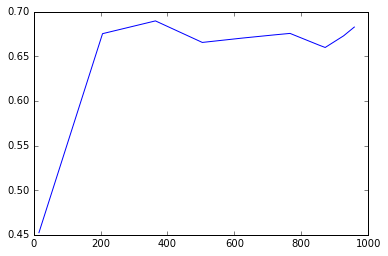

In [122]:
def P6(c_val):

    np.random.seed(0)
    
    cv = CountVectorizer() #create cv
    trans_train_data = cv.fit_transform(train_data) #fit cv to training data
    trans_dev_data = cv.transform(dev_data) #fit cv to dev data
    lr_l1 = LogisticRegression(penalty='l1',C=0.2) #create lr
    lr_l1_fit = lr_l1.fit(trans_train_data, train_labels) #fit lr to training data
    print 'Learned, nonzero weights for l1: ' + str(np.count_nonzero(lr_l1_fit.coef_)) #get number of 0 coefficients for the fit lr
    
    cv2 = CountVectorizer() #create second cv
    trans_train_data_2 = cv2.fit_transform(train_data) #fit second cv to training data
    trans_dev_data_2 = cv2.transform(dev_data) #fit second cv to dev data
    lr_l2 = LogisticRegression(penalty='l2',C=0.2) #create lr with l2 penalty
    lr_l2_fit = lr_l2.fit(trans_train_data, train_labels) #fit lr to training data
    print 'Learned, nonzero weights for l2: ' + str(np.count_nonzero(lr_l2_fit.coef_)) #get number of 0 coef. for l2 lr
    
    accuracy = [] #create empty array for accuracy and vocab size
    vocab_size = []
    for c in c_val: #iterate through all of the c-val parameters
        lr_l1_2 = LogisticRegression(penalty='l1',C=c) #create new lr, set penalty to l1 and C to input parameter
        lr_l1_2_fit = lr_l1_2.fit(trans_train_data, train_labels) #fit lr to training data
        nonzero_vocab = [] #create empty array for nonzero vocab
        count = 0
        for j in cv.vocabulary_: #iterate through each vocab key
            index = cv.vocabulary_.get(j) #get index of vocab
            #check to see if at least one of the coefficients is not zero
            if lr_l1_2_fit.coef_[0,index] != 0 or lr_l1_2_fit.coef_[1,index] != 0 or lr_l1_2_fit.coef_[2,index] != 0 or lr_l1_2_fit.coef_[3,index] != 0:
                nonzero_vocab.append(j) #after removing nonzero vocab, append to the array
                count = count + 1
                
        cv3 = CountVectorizer(vocabulary = nonzero_vocab) #create new cv using only the nonzero vocab
        trans_train_data_3 = cv3.fit_transform(train_data) #fit to the training data
        trans_dev_data_3 = cv3.transform(dev_data) #transform to the dev data
        
        lr_final = LogisticRegression(penalty='l2', C=c,tol=0.01) #create lr with l2 penalty
        lr_final_fit = lr_final.fit(trans_train_data_3, train_labels) #fit to training data
        preds = lr_final_fit.predict(trans_dev_data_3) #predict dev data
        accuracy.append(metrics.f1_score(dev_labels,preds,average='weighted')) #find accuracy of predictions
        vocab_size.append(len(nonzero_vocab))
    
    plt.plot(vocab_size,accuracy) 
    plt.show()

c_val = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

P6(c_val)

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [123]:
def P7():

    tvc = TfidfVectorizer() #create tv
    trans_train_data = tvc.fit_transform(train_data) #fit to training data
    trans_dev_data = tvc.transform(dev_data) #transform to dev data
    
    lr = LogisticRegression(C=100) #create lr
    lr = lr.fit(trans_train_data, train_labels) #fit lr to training data
    pred = lr.predict(trans_dev_data) #set predictions for dev data
    print 'Accuracy Score: ' + str(metrics.accuracy_score(dev_labels, pred)) #print accuracy score
    
    R_all = [] #create empty array to hold all Rs
    dev_prob = lr.predict_proba(trans_dev_data) #get probability predictions for dev data
    for i in range(dev_prob.shape[0]): #iterate through probability predictions
        max_pred_prob = max(dev_prob[i]) #find max prediction probability
        label_prob = dev_prob[i][dev_labels[i]] #find actual probability
        R = max_pred_prob / label_prob #calculate R
        R_all.append(R) #append R to array
    
    R_top = sorted(R_all, reverse = True)[:3] #get top three R
    for R in R_top:
        i = R_all.index(R)
        print '--------------------------------------------------------'
        print 'R Value for this document from ' + str(newsgroups_train.target_names[dev_labels[i]]) + ': ' + str(R) #get the actual label
        print 'Predicted Label: ' + str(newsgroups_train.target_names[pred[i]]) #get the predicted label
        print '\n'
        print dev_data[i] #show the text
        print '\n\n'


P7()

Accuracy Score: 0.763313609467
--------------------------------------------------------
R Value for this document from talk.religion.misc: 929.356631727
Predicted Label: comp.graphics


I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not

ANSWER: The model adjusts the weights of the keywords based on how frequently the words appear in certain categories as opposed to the rest of the data. In the second example, you can see that the model picked up on the keywords "Book of Mormon" and classified it as a document about religion. However, it appears that it was being used for graphic design work. We could implement a type of threshold that would require a keyword (or combinations of keywords) to appear a certain number of times before being taken into account by the model.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.